In [11]:
import geopandas as gpd
import csv
from urllib.request import urlopen
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
data = pd.read_csv(url)
data = data.dropna(subset=['continent'])
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')
data = data.rename(columns={'location': 'name', 'iso_code': 'iso_a3'})
data

,iso_a3,continent,name,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82502,ZWE,Africa,Zimbabwe,2021-04-14,37369.0,39.0,55.000,1548.0,5.0,2.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
82503,ZWE,Africa,Zimbabwe,2021-04-15,37422.0,53.0,52.857,1550.0,2.0,2.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
82504,ZWE,Africa,Zimbabwe,2021-04-16,37534.0,112.0,55.286,1551.0,1.0,2.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
82505,ZWE,Africa,Zimbabwe,2021-04-17,37699.0,165.0,60.857,1552.0,1.0,2.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [22]:
data.fillna(0)
data

,iso_a3,continent,name,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82502,ZWE,Africa,Zimbabwe,2021-04-14,37369.0,39.0,55.000,1548.0,5.0,2.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
82503,ZWE,Africa,Zimbabwe,2021-04-15,37422.0,53.0,52.857,1550.0,2.0,2.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
82504,ZWE,Africa,Zimbabwe,2021-04-16,37534.0,112.0,55.286,1551.0,1.0,2.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
82505,ZWE,Africa,Zimbabwe,2021-04-17,37699.0,165.0,60.857,1552.0,1.0,2.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [12]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [13]:
subdata = data[(data.date == '2021-04-01')]
subdata = subdata.rename(columns={'location': 'name', 'iso_code': 'iso_a3'})
subdata

,iso_a3,continent,name,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
402,AFG,Asia,Afghanistan,2021-04-01,56517.0,63.0,41.571,2489.0,5.0,3.143,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511
1252,ALB,Europe,Albania,2021-04-01,125506.0,349.0,391.286,2241.0,6.0,8.143,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
1671,DZA,Africa,Algeria,2021-04-01,117304.0,112.0,108.714,3096.0,3.0,3.571,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748
2084,AND,Europe,Andorra,2021-04-01,12053.0,43.0,52.286,115.0,0.0,0.143,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868
2479,AGO,Africa,Angola,2021-04-01,22399.0,88.0,69.286,538.0,1.0,0.857,...,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80418,VEN,South America,Venezuela,2021-04-01,161751.0,1254.0,1083.714,1615.0,13.0,11.857,...,16745.022,NaN,204.850,6.47,NaN,NaN,NaN,0.80,72.06,0.711
80870,VNM,Asia,Vietnam,2021-04-01,2617.0,14.0,5.429,35.0,0.0,0.000,...,6171.884,2.0,245.465,6.00,1.0,45.9,85.847,2.60,75.40,0.704
81697,YEM,Asia,Yemen,2021-04-01,4531.0,174.0,102.143,906.0,18.0,13.714,...,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.70,66.12,0.470
82094,ZMB,Africa,Zambia,2021-04-01,88549.0,131.0,175.857,1212.0,4.0,3.000,...,3689.251,57.5,234.499,3.94,3.1,24.7,13.938,2.00,63.89,0.584


In [14]:
world2 = pd.merge(world, subdata, on='iso_a3')

In [15]:
world2

,pop_est,continent_x,name_x,iso_a3,gdp_md_est,geometry,continent_y,name_y,date,total_cases,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Oceania,Fiji,2021-04-01,67.0,...,8702.975,1.4,412.820,14.49,10.2,34.8,NaN,2.300,67.44,0.743
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Africa,Tanzania,2021-04-01,509.0,...,2683.304,49.1,217.288,5.75,3.3,26.7,47.953,0.700,65.46,0.529
2,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",North America,Canada,2021-04-01,994549.0,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.500,82.43,0.929
3,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",North America,United States,2021-04-01,30541255.0,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.770,78.86,0.926
4,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Asia,Kazakhstan,2021-04-01,299626.0,...,24055.588,0.1,466.792,7.11,7.0,43.1,98.999,6.700,73.60,0.825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,2103721,Europe,Macedonia,MKD,29520.0,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",Europe,North Macedonia,2021-04-01,131424.0,...,13111.214,5.0,322.688,10.08,NaN,NaN,NaN,4.280,75.80,0.774
161,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Europe,Serbia,2021-04-01,605406.0,...,14048.881,NaN,439.415,10.08,37.7,40.2,97.719,5.609,76.00,0.806
162,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Europe,Montenegro,2021-04-01,91573.0,...,16409.288,1.0,387.305,10.08,44.0,47.9,NaN,3.861,76.88,0.829
163,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",North America,Trinidad and Tobago,2021-04-01,8072.0,...,28763.071,NaN,228.467,10.97,NaN,NaN,89.443,3.000,73.51,0.796


<AxesSubplot:>

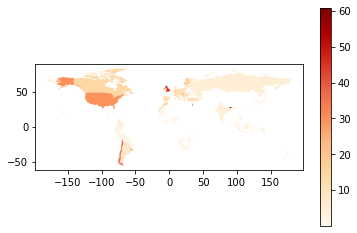

In [16]:
world2.plot(column='people_vaccinated_per_hundred', cmap='OrRd', legend=True)

In [42]:
dates = ['2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01'
        '2020-10-01', '2020-11-01','2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01']
def worldmap(date, parameter, df):
    subdata = df[(df.date==date)]
    subdata = subdata.fillna(0)
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    merged_df = world2 = pd.merge(world, subdata, on='iso_a3')
    merged_df.plot(column=parameter, cmap='OrRd', legend=True)
    plt.title(date)
    plt.savefig(f'{date}.png')

    

/opt/anaconda3/envs/geo/lib/python3.9/site-packages/geopandas/plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


ValueError: cannot convert float NaN to integer

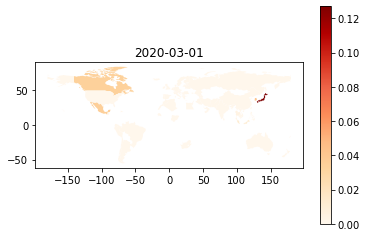

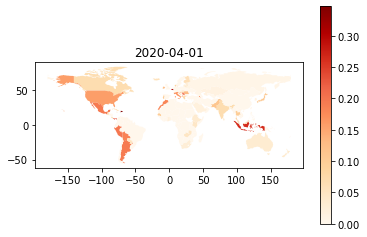

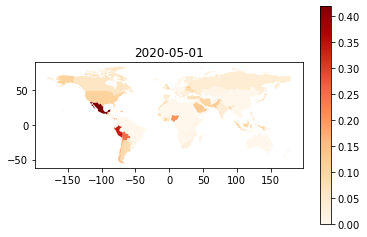

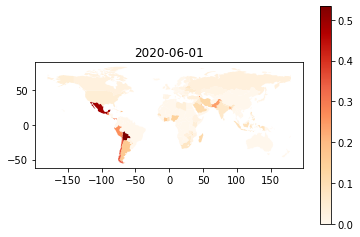

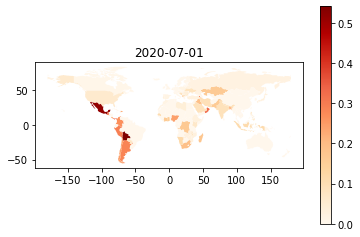

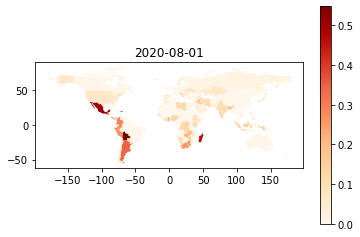

ValueError: cannot convert float NaN to integer

In [44]:
for date in dates:
    worldmap(date, 'positive_rate', data)


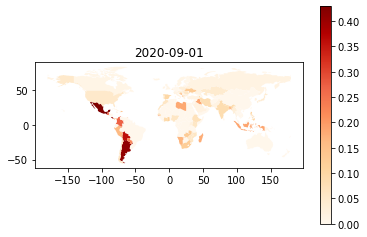

In [45]:
worldmap('2020-09-01', 'positive_rate', data)

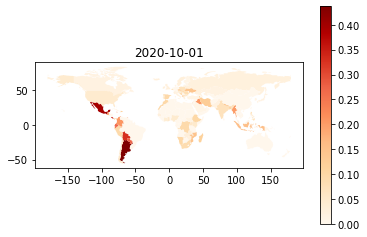

In [46]:
worldmap('2020-10-01', 'positive_rate', data)

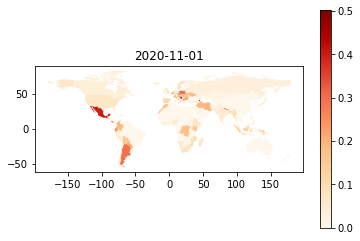

In [47]:
worldmap('2020-11-01', 'positive_rate', data)

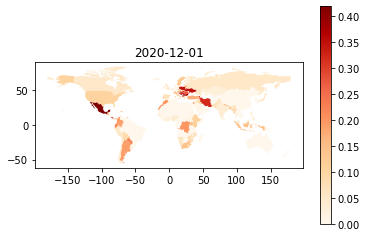

In [48]:
worldmap('2020-12-01', 'positive_rate', data)

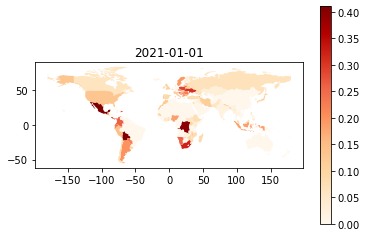

In [49]:
worldmap('2021-01-01', 'positive_rate', data)

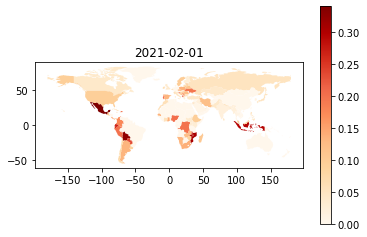

In [50]:
worldmap('2021-02-01', 'positive_rate', data)

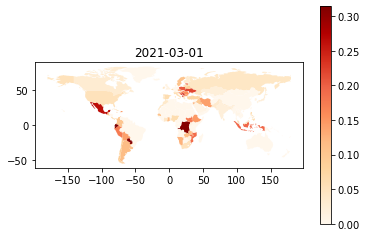

In [51]:
worldmap('2021-03-01', 'positive_rate', data)

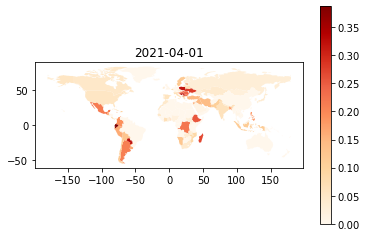

In [52]:
worldmap('2021-04-01', 'positive_rate', data)